<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Trabajo de Fin de Máster</header1></center>
<left><h1>Predicción de gastos operativos mediante técnicas de aprendizaje automático: Análisis del área contable del sistema SPRO de una empresa de Manta, Ecuador</header1></left>

*   Espinoza Zambrano José Vicente

In [1]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset_v1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   anio_id                       6076 non-null   int64  
 1   mes_id                        6076 non-null   int64  
 2   proyecto_id                   6076 non-null   int64  
 3   salario_basico                6076 non-null   int64  
 4   canasta_basica_familiar       6076 non-null   float64
 5   iva                           6076 non-null   int64  
 6   valor_activos_fijos           6076 non-null   float64
 7   numero_activos_fijos          6076 non-null   int64  
 8   empleados_menor_basico        6076 non-null   int64  
 9   empleados_basico_mil          6076 non-null   int64  
 10  empleados_mil_dos_mil         6076 non-null   int64  
 11  empleados_dos_mil_cuatro_mil  6076 non-null   int64  
 12  jubilados_menor_basico        6076 non-null   int64  
 13  ing

In [3]:
df.shape

(6076, 17)

In [4]:
df.head()

,anio_id,mes_id,proyecto_id,salario_basico,canasta_basica_familiar,iva,valor_activos_fijos,numero_activos_fijos,empleados_menor_basico,empleados_basico_mil,empleados_mil_dos_mil,empleados_dos_mil_cuatro_mil,jubilados_menor_basico,ingreso_operacional,ingreso_no_operacional,gasto_operativo,gasto_operativo_valor
0,2023,4,2,450,764.71,12,10794.1,135,1,97,6,2,25,1229886.24,5219.82,5.1.01.05.01,3486.78
1,2023,4,2,450,764.71,12,10794.1,135,1,97,6,2,25,1229886.24,5219.82,5.1.01.16.04,3553.50
2,2023,4,2,450,764.71,12,10794.1,135,1,97,6,2,25,1229886.24,5219.82,5.1.01.16.03,1800.60
3,2023,4,2,450,764.71,12,10794.1,135,1,97,6,2,25,1229886.24,5219.82,5.1.01.16.02,335.07
4,2023,4,2,450,764.71,12,10794.1,135,1,97,6,2,25,1229886.24,5219.82,5.1.01.16.01,4731.32


In [5]:
df = df.drop(["proyecto_id"], axis=1)
df.describe()

,anio_id,mes_id,salario_basico,canasta_basica_familiar,iva,valor_activos_fijos,numero_activos_fijos,empleados_menor_basico,empleados_basico_mil,empleados_mil_dos_mil,empleados_dos_mil_cuatro_mil,jubilados_menor_basico,ingreso_operacional,ingreso_no_operacional,gasto_operativo_valor
count,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6.076000e+03,6076.000000,6076.000000
mean,2023.842660,6.405695,458.426596,793.555984,13.684167,5101.387786,86.955892,0.757077,60.098420,1.660961,1.211159,11.702271,6.256844e+05,1808.544098,2538.140644
std,0.697035,3.381795,6.970346,9.525795,1.488774,2773.950660,33.581555,1.370437,26.246916,1.396974,0.794226,8.600013,3.791639e+05,1898.297997,9012.819498
min,2023.000000,1.000000,450.000000,764.710000,12.000000,26.260000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.619125e+04,331.770000,0.000000
25%,2023.000000,4.000000,450.000000,795.750000,12.000000,4039.620000,72.000000,0.000000,53.000000,1.000000,1.000000,4.000000,3.327938e+05,523.530000,114.975000
50%,2024.000000,6.000000,460.000000,797.970000,15.000000,4809.180000,87.000000,0.000000,59.000000,1.000000,1.000000,9.000000,5.502722e+05,725.080000,389.290000
75%,2024.000000,9.000000,460.000000,797.970000,15.000000,5617.190000,109.000000,1.000000,63.000000,2.000000,2.000000,15.000000,8.283641e+05,2682.690000,1438.642500
max,2025.000000,12.000000,470.000000,798.310000,15.000000,10806.310000,145.000000,11.000000,112.000000,6.000000,2.000000,29.000000,1.294990e+06,6973.220000,224111.530000


In [6]:
df.isnull().any()

anio_id                         False
mes_id                          False
salario_basico                  False
canasta_basica_familiar         False
iva                             False
valor_activos_fijos             False
numero_activos_fijos            False
empleados_menor_basico          False
empleados_basico_mil            False
empleados_mil_dos_mil           False
empleados_dos_mil_cuatro_mil    False
jubilados_menor_basico          False
ingreso_operacional             False
ingreso_no_operacional          False
gasto_operativo                 False
gasto_operativo_valor           False
dtype: bool

In [7]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Cantidad')

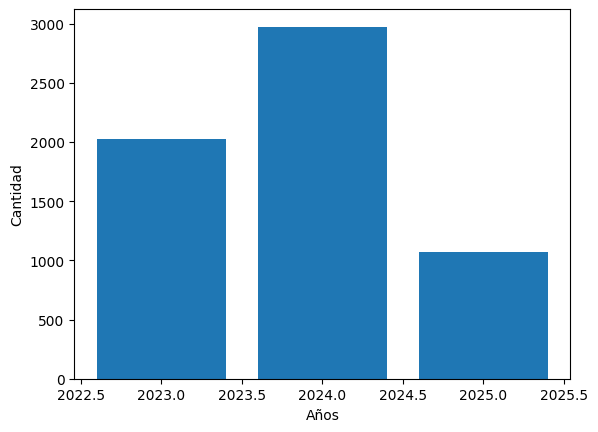

In [8]:
conteo = df['anio_id'].value_counts()

plt.bar(conteo.index, conteo)
plt.xlabel('Años')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

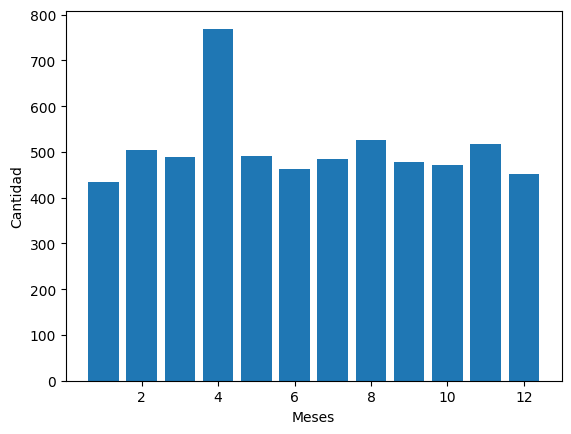

In [9]:
conteo = df['mes_id'].value_counts()

plt.bar(conteo.index, conteo)
plt.xlabel('Meses')
plt.ylabel('Cantidad')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16304\364441289.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=gasto_counts.index, x=gasto_counts.values, palette='viridis')


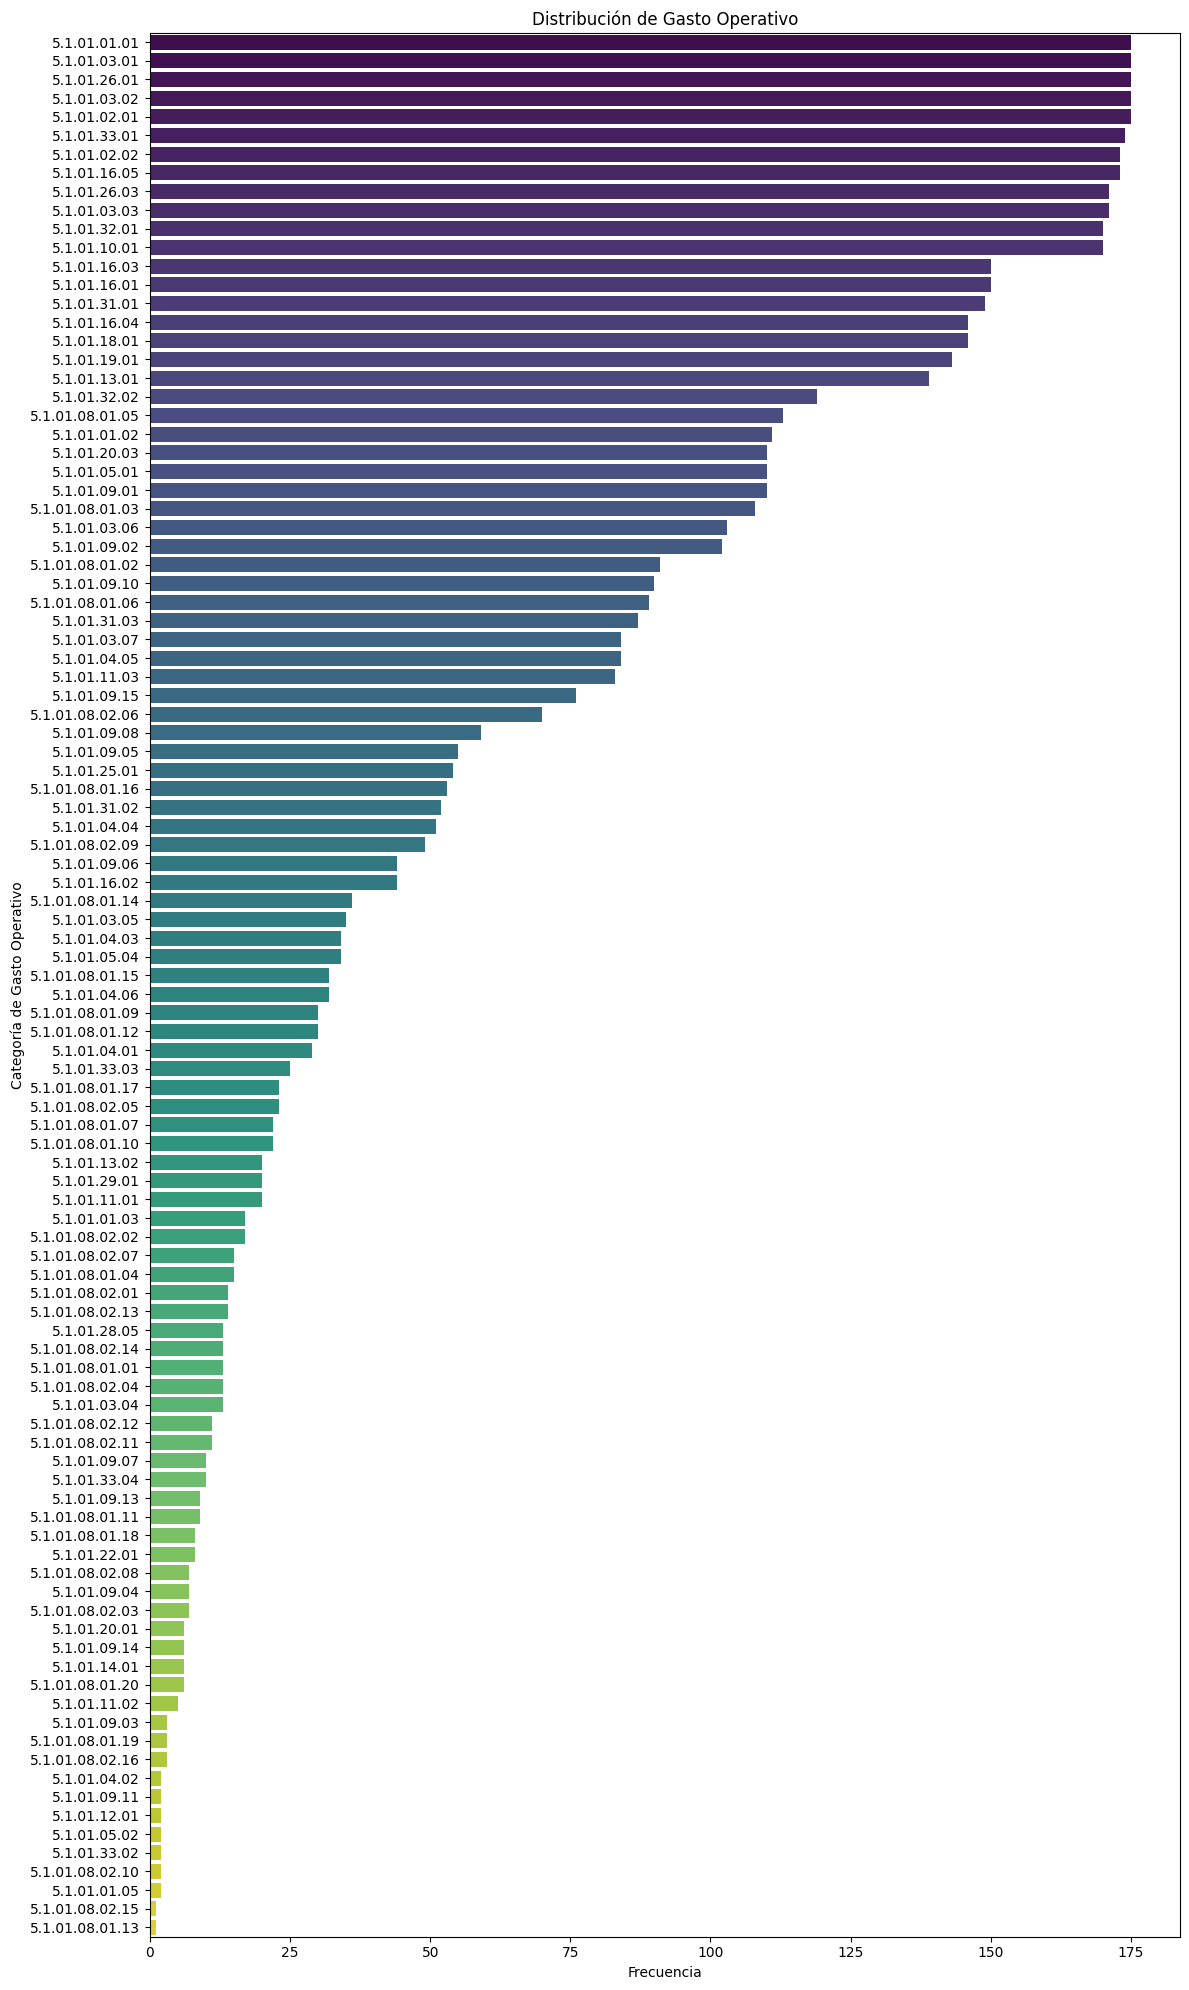

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 20))
gasto_counts = df['gasto_operativo'].value_counts()

sns.barplot(y=gasto_counts.index, x=gasto_counts.values, palette='viridis')
plt.title('Distribución de Gasto Operativo')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría de Gasto Operativo')
plt.tight_layout()
plt.show()
